<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [2.1 Process Variables](https://jckantor.github.io/cbe30338-2021/02.01-Process-Variables.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [2.3 Blending Tank Simulation](https://jckantor.github.io/cbe30338-2021/02.03-Blending-Tank-Simulation.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/../cbe30338-2021/docs/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 2.2 Gravity Drained Tank

## 2.2.1 Summary

In the example we study the problem of constructing nonlinear process model for the liquid level in a gravity drained tank.

## 2.2.2 Torricelli's law

Torricelli's law states the velocity of an incompressible liquid stream exiting a liquid tank at level $h$ below the surface is 

$$v = \sqrt{2gh}$$ 

This is the same velocity as an object dropped from a height $h$. The derivation is straightforward. From Bernoulli's principle,

$$\frac{v^2}{2} + gh + \frac{P}{\rho} = \text{constant}$$

Applying this principle, compare a drop of water just below the surface of the water at distance $h$ above the exit, to a drop of water exiting the tank

$$gh + \frac{P_{atm}}{\rho} = \frac{v^2}{2} + \frac{P_{atm}}{\rho}$$

$$\implies v^2 = 2gh$$
$$\implies v = \sqrt{2gh}$$

Torricelli's law is an approximation that doesn't account for the effects of fluid viscosity, the specific flow geometry near the exit, or other flow non-idealities. Nevertheless it is a useful first approximation for flow from a tank.

## 2.2.3 Mass Balance for Tank with Constant Cross-Sectional Area

For a tank with constant cross-sectional area, such as a cylindrical or rectangular tank, the liquid height is described by a differential equation

$$A\frac{dh}{dt} = q_{in}(t) - q_{out}(t)$$

where $q_{out}$ is a function of liquid height. Torricelli's law tells the outlet flow from the tank is proportional to square root of the liquid height

$$ q_{out}(h) = C_v\sqrt{h} $$

Dividing by area we obtain a nonlinear ordinary differential equation 

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in}(t) $$

in our standard form where the LHS derivative appears with a constant coefficient of 1.

## 2.2.4 Step-by-Step Approach to Nonlinear Simulation

### 2.2.4.1 Step 1. Initialize Jupyter and Python

The first step in any Python application is to initialize graphics display (if you will be creating graphic output), and import any needed libraries.  

The `%matplotlib inline` is a command telling the Jupyter notebook to display any graphics inside this notebook.

We then import a standard graphics library (`matplotlib.pyplot`) that will be referred to with the prefix `plt`, a standard numerical library `numpy` that will be referred to with the prefix `np`, and the function `odeint` from the `scipy.integrate` library.  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### 2.2.4.2 Step 2. Define parameters

Provide values for all relevant parameters.  Use comments to describe the parameters and units.

In [ ]:
Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

### 2.2.4.3 Step 3. Write Functions for the RHS of the Differential Equations

In [ ]:
# inlet flow rate in cubic meters/min
def qin(t):
    return 0.15

def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

### 2.2.4.4 Step 4. Choose an Initial Condition, a Time Grid, and Integrate the Differential Equation

In [ ]:
IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(deriv,IC,t)

### 2.2.4.5 Step 5. Visualize and Analyze Results

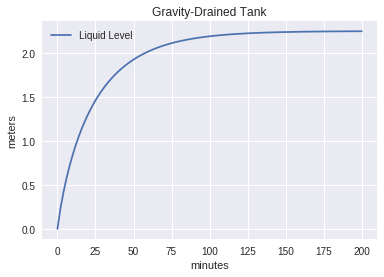

In [6]:
plt.plot(t,h)

plt.xlabel('minutes')
plt.ylabel('meters')
plt.title('Gravity-Drained Tank')
plt.legend(['Liquid Level']);

### 2.2.4.6 Step 6.  Adjust and Repeat as Needed

Rarely does a simulation provide you with the information you seek on the first try.  You will almost certainly need to revise parameter values, choose different time grids, and add visualization features to obtain the most informative results.

<!--NAVIGATION-->
< [2.1 Process Variables](https://jckantor.github.io/cbe30338-2021/02.01-Process-Variables.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [2.3 Blending Tank Simulation](https://jckantor.github.io/cbe30338-2021/02.03-Blending-Tank-Simulation.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/../cbe30338-2021/docs/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/02.02-Gravity-Drained-Tank.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>